# Poker Hand Data Set 

### Relevant Information:

Each record is an example of a hand consisting of five playing
cards drawn from a standard deck of 52. Each card is described
using two attributes (suit and rank), for a total of 10 predictive
attributes. There is one Class attribute that describes the
�Poker Hand�. The order of cards is important, which is why there
are 480 possible Royal Flush hands as compared to 4 (one for each
suit � explained in more detail below).

### Statistics:
|||||
| - | - | - | - |
| Poker Hand       | # of hands	| Probability	| # of combinations
| Royal Flush      | 4		| 0.00000154	| 480
| Straight Flush   | 36		| 0.00001385	| 4320
| Four of a kind   | 624		| 0.0002401	| 74880
| Full house       | 3744		| 0.00144058	| 449280
| Flush            | 5108		| 0.0019654	| 612960
| Straight         | 10200		| 0.00392464	| 1224000
| Three of a kind  | 54912		| 0.02112845	| 6589440
| Two pairs        | 123552		| 0.04753902	| 14826240
| One pair         | 1098240	| 0.42256903	| 31788800
| Nothing          | 1302540	| 0.50117739	| 156304800
| | | | |
| Total            | 2598960	| 1.0		| 311875200

# Preprocessing Data

In [65]:
import numpy as np
import pandas as pd

import keras
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense, LeakyReLU
from keras.models import Model
from keras.utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
path = 'data/Poker/poker-hand-training-true.data'
df = pd.read_csv(path, names=range(0,11))

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [52]:
x_train = to_categorical(df[df.columns[:-1]])
y_train = to_categorical(df[df.columns[-1]])
x_train[0], y_train[0]

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [53]:
df_test = pd.read_csv('data/Poker/poker-hand-testing.data')

In [54]:
x_test = to_categorical(df_test[df_test.columns[:-1]])
y_test = to_categorical(df_test[df_test.columns[-1]])

# Model

In [ ]:
plt.subplot(1,3,2)

In [61]:
shape0, shape1 = X.shape[1:]
shape0, shape1

(10, 14)

In [62]:
inputs = Input(shape=(shape0, shape1, ))

# a layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dense(64)(x)
x = LeakyReLU()(x)
predictions = Dense(10, activation='softmax')(x)

In [63]:
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
model.summary()
# plot_model(model, to_file='model.png')
# plt.figure(figsize=(10,10))
# img=mpimg.imread('model.png')
# imgplot = plt.imshow(img)
# plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10, 14)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 140)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                9024      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total para

In [64]:
history = model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          epochs=10, 
          batch_size=32,)  # starts training

Train on 25010 samples, validate on 999999 samples
Epoch 1/10
25010/25010 [==============================] - 15s 608us/step - loss: 1.0221 - acc: 0.4832 - val_loss: 0.9897 - val_acc: 0.5021
Epoch 2/10
25010/25010 [==============================] - 15s 610us/step - loss: 0.9829 - acc: 0.5051 - val_loss: 0.9757 - val_acc: 0.5261
Epoch 3/10
25010/25010 [==============================] - 16s 640us/step - loss: 0.9471 - acc: 0.5620 - val_loss: 0.9039 - val_acc: 0.6100
Epoch 4/10
25010/25010 [==============================] - 17s 664us/step - loss: 0.8030 - acc: 0.6742 - val_loss: 0.7173 - val_acc: 0.7210
Epoch 5/10
25010/25010 [==============================] - 16s 654us/step - loss: 0.5736 - acc: 0.7980 - val_loss: 0.4683 - val_acc: 0.8498
Epoch 6/10
25010/25010 [==============================] - 16s 630us/step - loss: 0.3416 - acc: 0.8973 - val_loss: 0.2750 - val_acc: 0.9155
Epoch 7/10
25010/25010 [==============================] - 16s 646us/step - loss: 0.2142 - acc: 0.9426 - val_loss: 0

NameError: name 'plt' is not defined

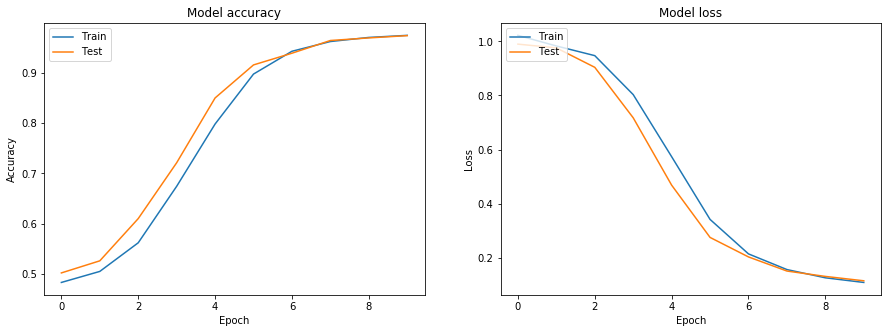

In [82]:
plt.figure(figsize=(15,5))


# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()